# Digit Recognition System on MNIST Dataset Using LeNet-5 CNN Model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


# importing data

In [2]:
#importing datasets

df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df2 = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print(df.shape)
print(df2.shape)

(42000, 785)
(28000, 784)


In [3]:
from sklearn.preprocessing import OneHotEncoder

x = np.array(df.drop('label',axis=1))/255
y = np.array(df.label)
test = np.array(df2)/255

enc = OneHotEncoder(sparse=False)
y= y.reshape((-1,1))
y = enc.fit_transform(y)

print(x.shape)
print(y.shape)
print(test.shape)

(42000, 784)
(42000, 10)
(28000, 784)


# reshaping data to make it ready for CNN model (convert to 28*28 array)

In [4]:
x_2d = x.reshape((x.shape[0],28,28,1))
test_2d = test.reshape((test.shape[0],28,28,1))

print(x_2d.shape)
print(test_2d.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


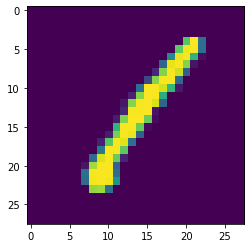

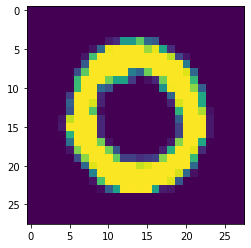

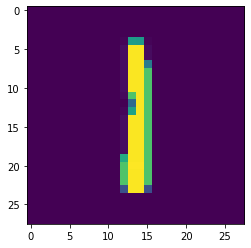

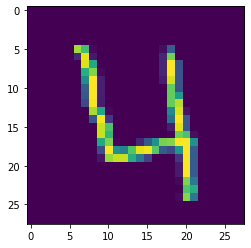

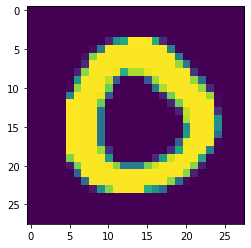

In [5]:
for i in range(5):
    plt.figure()
    plt.imshow(np.squeeze(x_2d[i]))

# Test Trsin Split

In [6]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(x_2d,y,test_size = 0.15, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35700, 28, 28, 1)
(35700, 10)
(6300, 28, 28, 1)
(6300, 10)


# Creating CNN model

In [7]:
# importing required librery and moduls

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import applications

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [9]:
# setting for early stopping

from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=15,
        verbose=1)
]

Epoch 1/500
657/657 [==============================] - 5s 7ms/step - loss: 0.2237 - accuracy: 0.9314 - val_loss: 0.0491 - val_accuracy: 0.9838
Epoch 2/500
657/657 [==============================] - 4s 7ms/step - loss: 0.0732 - accuracy: 0.9772 - val_loss: 0.0264 - val_accuracy: 0.9913
Epoch 3/500
657/657 [==============================] - 4s 7ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0214 - val_accuracy: 0.9933
Epoch 4/500
657/657 [==============================] - 5s 7ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0266 - val_accuracy: 0.9908
Epoch 5/500
657/657 [==============================] - 4s 7ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0169 - val_accuracy: 0.9949
Epoch 6/500
657/657 [==============================] - 5s 7ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0203 - val_accuracy: 0.9929
Epoch 7/500
657/657 [==============================] - 4s 7ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0128 - val_accuracy: 0.9956

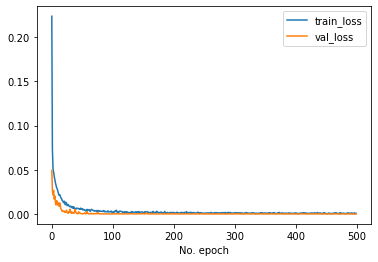

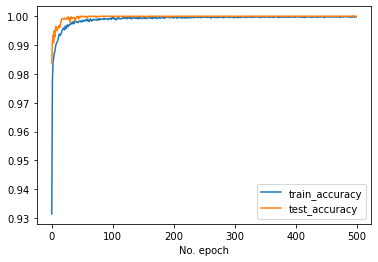

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_2d,y,batch_size=64,epochs=500,validation_data=(x_test,y_test))

plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

plt.figure()

plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='test_accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

Epoch 1/100
657/657 [==============================] - 5s 7ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 8.8736e-08 - val_accuracy: 1.0000
Epoch 2/100
657/657 [==============================] - 4s 7ms/step - loss: 5.0074e-04 - accuracy: 0.9999 - val_loss: 5.1293e-08 - val_accuracy: 1.0000
Epoch 3/100
657/657 [==============================] - 5s 7ms/step - loss: 1.6046e-04 - accuracy: 1.0000 - val_loss: 1.0615e-08 - val_accuracy: 1.0000
Epoch 4/100
657/657 [==============================] - 4s 7ms/step - loss: 6.7989e-04 - accuracy: 0.9998 - val_loss: 1.1841e-07 - val_accuracy: 1.0000
Epoch 5/100
657/657 [==============================] - 4s 7ms/step - loss: 8.6689e-04 - accuracy: 0.9997 - val_loss: 1.8676e-08 - val_accuracy: 1.0000
Epoch 6/100
657/657 [==============================] - 5s 7ms/step - loss: 8.8004e-04 - accuracy: 0.9997 - val_loss: 8.8391e-08 - val_accuracy: 1.0000
Epoch 7/100
657/657 [==============================] - 4s 7ms/step - loss: 3.7512e-04 - accuracy: 

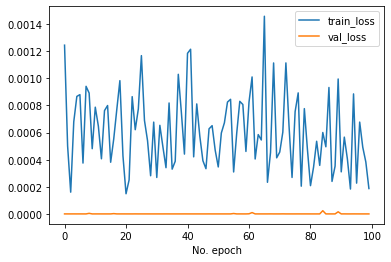

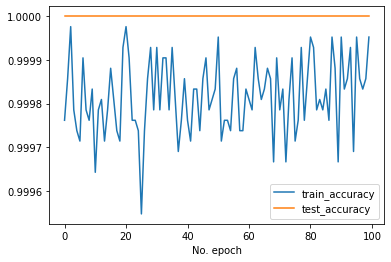

In [11]:
history = model.fit(x_2d,y,batch_size=64,epochs=100,validation_data=(x_test,y_test))

plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

plt.figure()

plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='test_accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [12]:
scores = model.evaluate(x_test, y_test, verbose = 10 )
print ( scores )

[8.041769916644625e-09, 1.0]


In [13]:
predictions=model.predict(test_2d)
pre=predictions.argmax(axis=-1)

In [14]:
submission = pd.Series(pre,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.to_csv("final_submission_lenet5.csv",index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
